In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.signal import convolve2d
from scipy.optimize import curve_fit


In [3]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

In [4]:
def gaussian_2d(coor, x0, y0, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    )

def double_gaussian_2d(coor, x0, y0, x1, y1, sigma_x0, sigma_y0, sigma_x1, sigma_y1, amplitude0, amplitude1, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude0 * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x0 ** 2) + ((y - y0) ** 2) / (2 * sigma_y0 ** 2))
    ) + amplitude1 * np.exp(
        -(((x - x1) ** 2) / (2 * sigma_x1 ** 2) + ((y - y1) ** 2) / (2 * sigma_y1 ** 2))
    )

## 100*100 Correlation Diagonal Hopping

### no drive, pgen=0.001*i, nsim=5000, d 1-10

In [42]:
file_name = "../data/240630/240630_d5_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

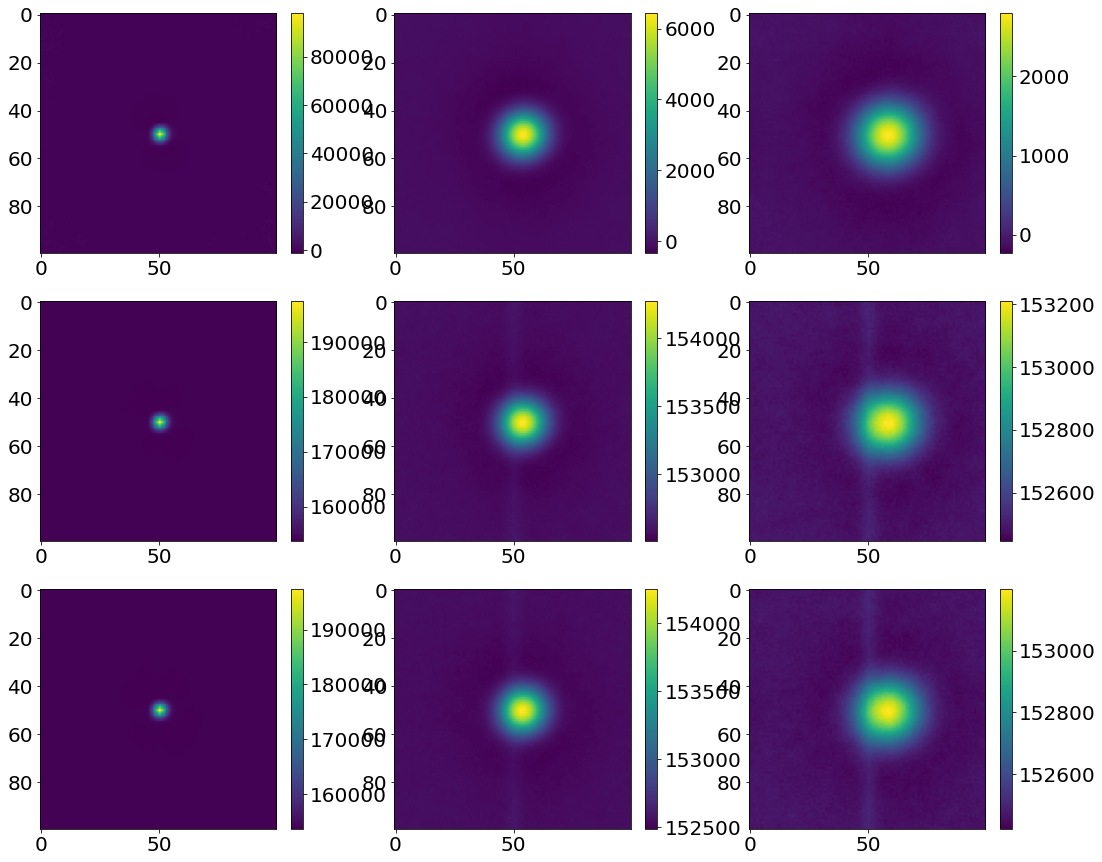

In [43]:
t1 = 4
t2 = 50
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

In [44]:
def gaussian_2d(coor, x0, y0, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    )

params_l = []
# for t in range(int(scoor.shape[-1]/2)):
for t in range(200):
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    initial_guess = (scoor_t.shape[1] / 2, scoor_t.shape[0] / 2, 1, 1, np.max(scoor_t), np.min(scoor_t))
    
    # Fit the data
    params, _ = curve_fit(gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    x0, y0, sigma_x, sigma_y, amplitude, offset = params
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

/usr/local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(200, 6)

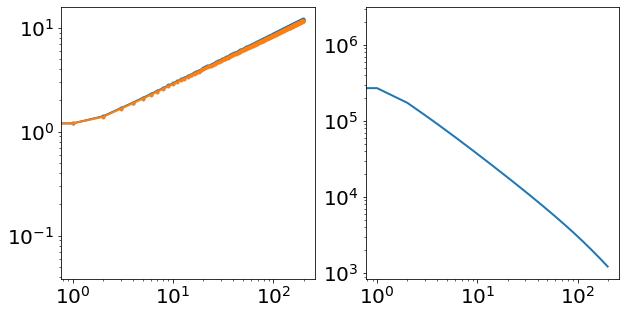

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((params_l[:,2]+params_l[:,3])/2,'.-')
plt.plot(params_l[:,3],'.-')
# plt.ylim(1e0,1e1)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.plot(params_l[:,4])
plt.xscale('log')
plt.yscale('log')

In [46]:
slope_start = 10
slope_end = 180

tfit_l = np.arange(slope_start,slope_end,dtype=int)
m, b = np.polyfit(np.log(tfit_l), np.log((params_l[slope_start:slope_end,2]+params_l[slope_start:slope_end,3])/2), 1)
print("var exponents", m)
m, b = np.polyfit(np.log(tfit_l), np.log(params_l[slope_start:slope_end,4]), 1)
print("var exponents", m)

var exponents 0.47183664441005985
var exponents -1.149857966777387


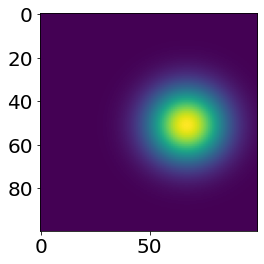

In [47]:
fitted_gaussian = gaussian_2d((x, y), *params).reshape(scoor_t.shape)
plt.imshow(fitted_gaussian)


###  drive, pdr=0.01*i pgen=0.001, nsim=5000, d11-20

In [21]:
i = 3
file_name = "../data/240630/240630_d%d_"%(10+i)
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

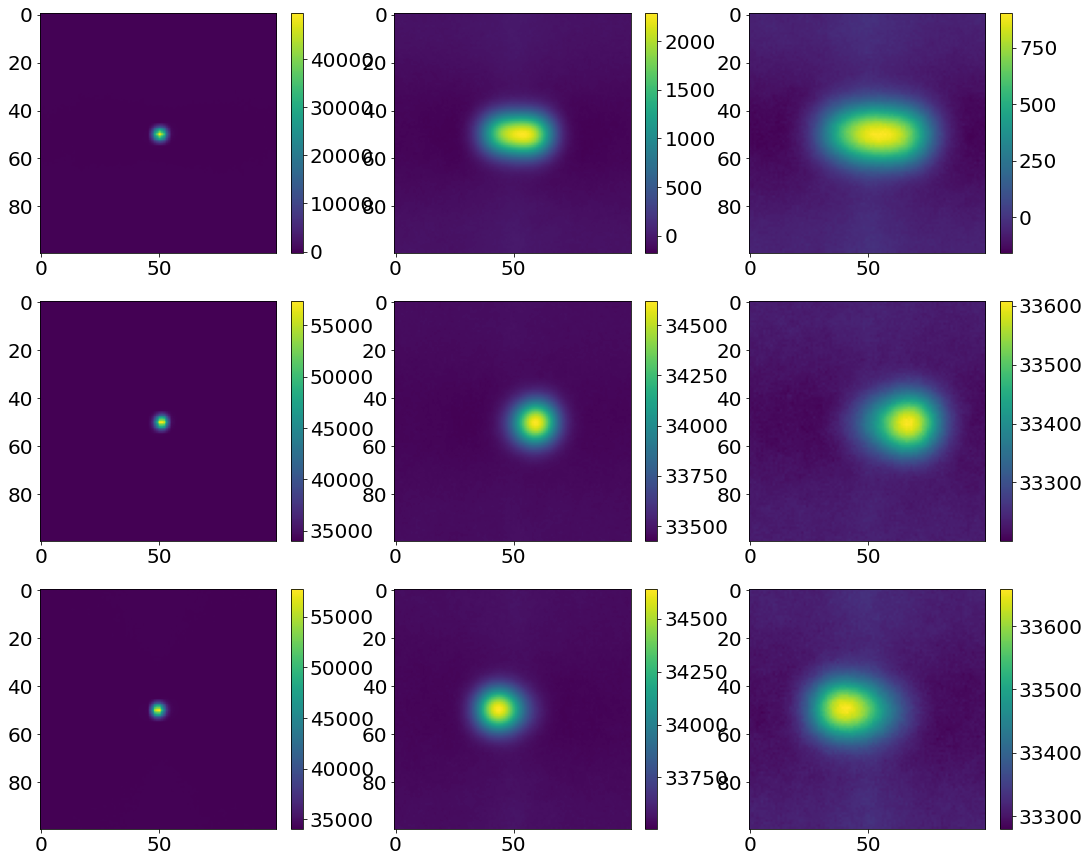

In [22]:
t1 = 4
t2 = 50
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

In [28]:
def double_gaussian_2d(coor, x0, y0, x1, y1, sigma_x0, sigma_y0, sigma_x1, sigma_y1, amplitude0, amplitude1, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude0 * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x0 ** 2) + ((y - y0) ** 2) / (2 * sigma_y0 ** 2))
    ) + amplitude1 * np.exp(
        -(((x - x1) ** 2) / (2 * sigma_x1 ** 2) + ((y - y1) ** 2) / (2 * sigma_y1 ** 2))
    )

params_l = []
# for t in range(int(scoor.shape[-1]/2)):
for t in range(10,150):
    print(t)
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    initial_guess = (scoor_t.shape[1] / 2 - t/500*i*25, scoor_t.shape[0] / 2 ,
                    scoor_t.shape[1] / 2 + t/500*i*25, scoor_t.shape[0] / 2,  
                    1, 1, 
                    1, 1,
                    np.max(scoor_t), np.max(scoor_t), 
                    np.min(scoor_t)
                    )

    # Fit the data
    params, _ = curve_fit(double_gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


(140, 11)

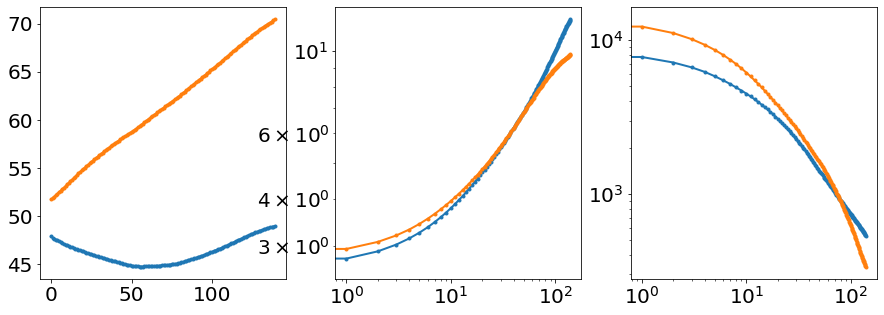

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(params_l[:,0],'.-')
plt.plot(params_l[:,2],'.-')
plt.subplot(1,3,2)
plt.plot((params_l[:,4]+params_l[:,5])/2,'.-')
plt.plot((params_l[:,6]+params_l[:,7])/2,'.-')
# plt.ylim(1e0,1e1)
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,3,3)
plt.plot(params_l[:,8],'.-')
plt.plot(params_l[:,9],'.-')
plt.xscale('log')
plt.yscale('log')

###  drive, pdr=0.01*i pgen=0.01, nsim=5000, d21-30

In [35]:
i = 10
file_name = "../data/240630/240630_d%d_"%(20+i)
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

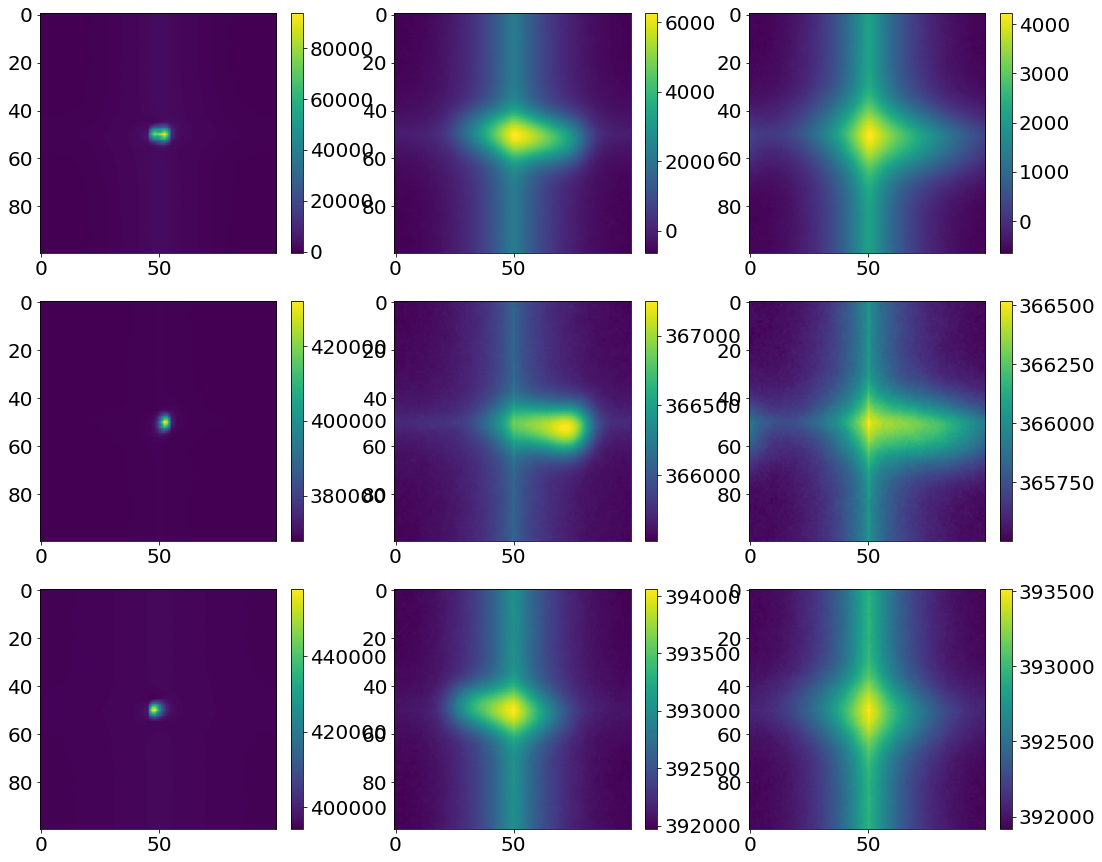

In [36]:
t1 = 4
t2 = 50
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

### no drive, pgen=0.001*i, nsim=30000, d31-40

###  drive, pdr=0.01*i pgen=0.001, nsim=30000, d41-50